#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches

plt.style.use('default')

#### Soft Sensor

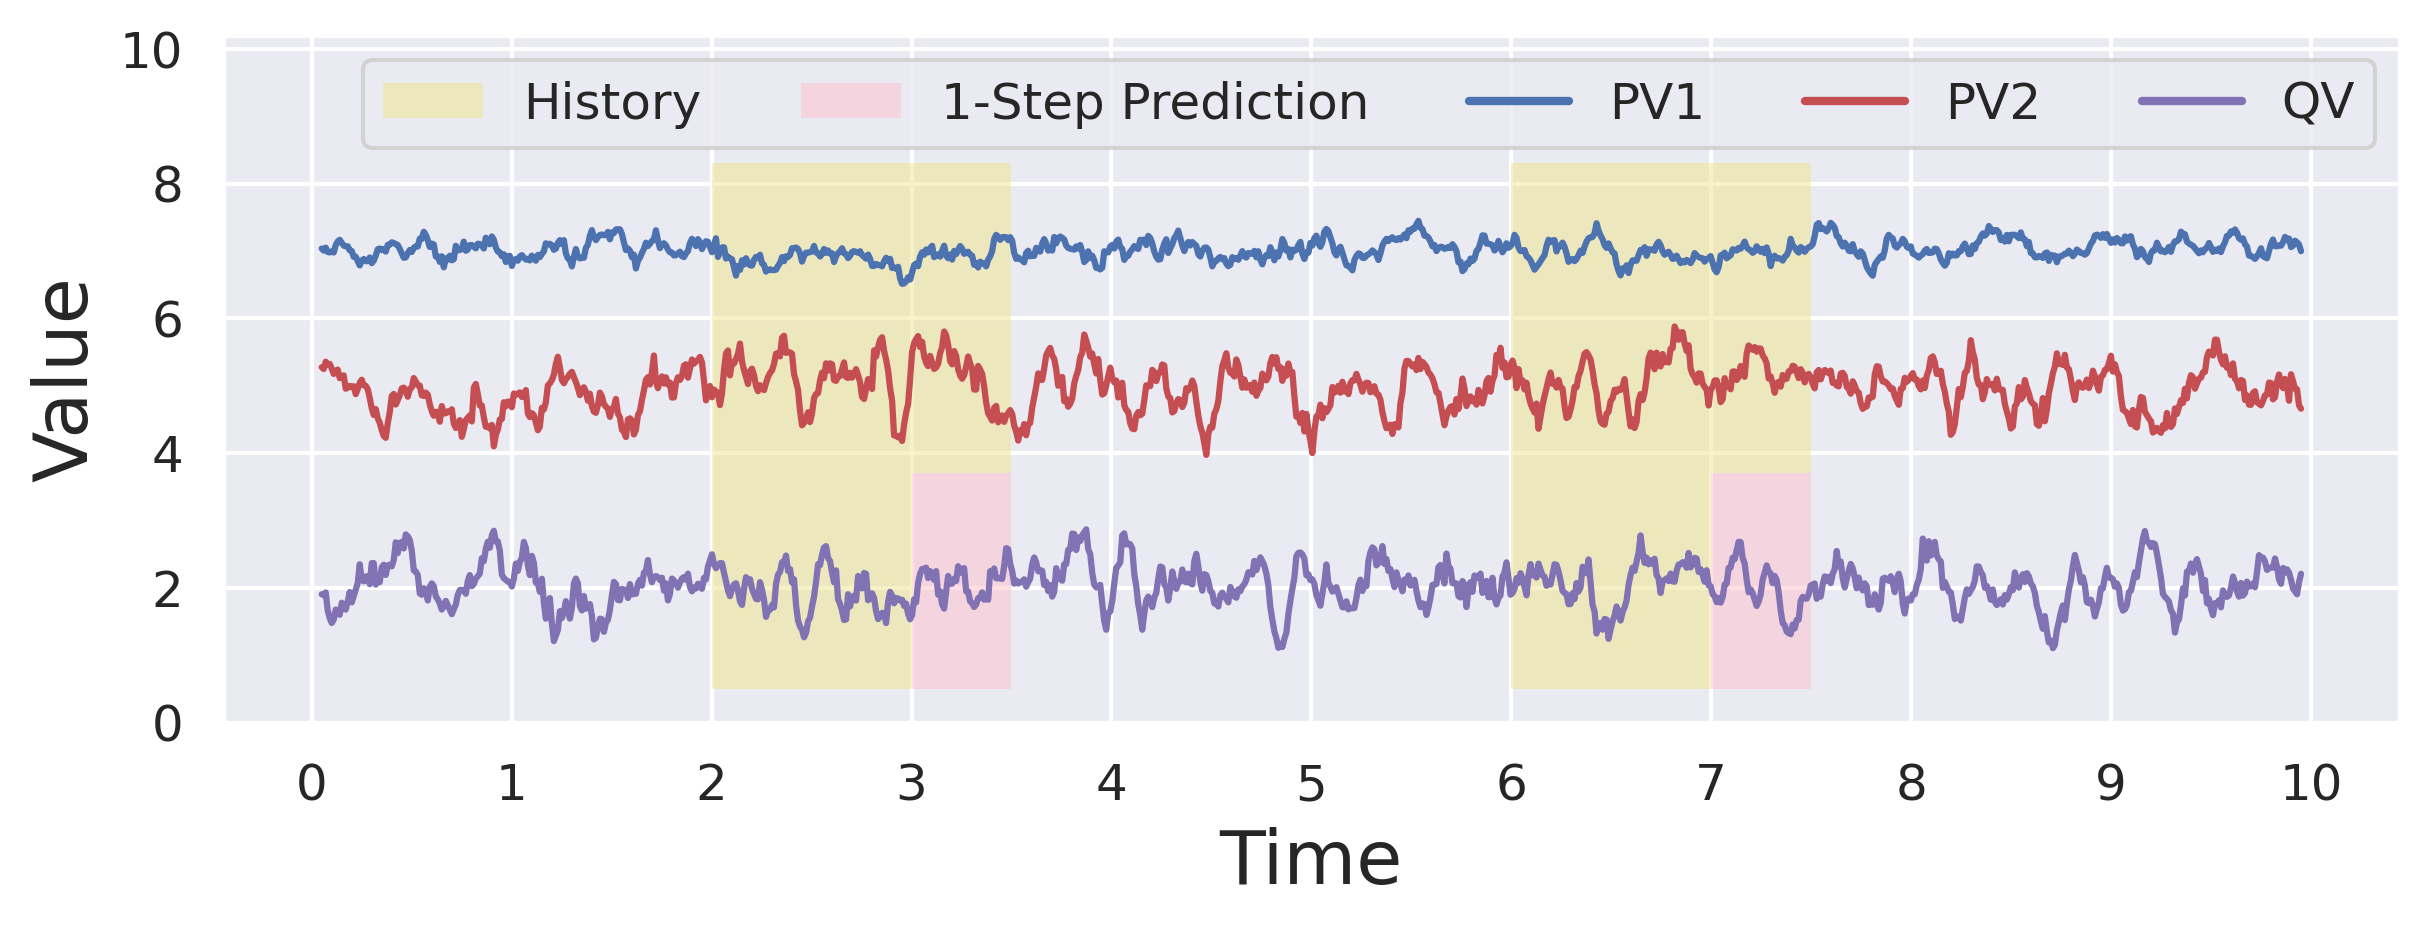

In [58]:
np.random.seed(2024)

sns.set_theme(style="dark")
sns.set_context("notebook", font_scale=1.5, rc={"font.family": "Arial"})
palette = sns.color_palette("deep")
custom_palette = [palette[0], palette[3], palette[4]] + palette[4:]

sns.set_palette(custom_palette)

# 生成 x 坐标
x = np.linspace(0, 10, 1000)  # 1000 个均匀分布的点

# 生成多个随机 y 坐标
num_variables = 3
mean_values = [7, 5, 2]       # 每个变量的均值
std_dev_values = [0.5, 1, 1]  # 每个变量的标准差
legends = ['PV1', 'PV2', 'QV']

# 创建一个图形
f = plt.figure(figsize=(8, 3), dpi=300)

for mean, std_dev, legend in zip(mean_values, std_dev_values, legends):
    y = np.random.normal(loc=mean, scale=std_dev, size=1000)
    window_size = 10  # 窗口大小
    y_smooth = np.convolve(y, np.ones(window_size) / window_size, mode='same')

    idx = slice(window_size // 2, -window_size // 2)
    plt.plot(x[idx], y_smooth[idx], label=legend)

rect = patches.Rectangle((2, 0.5), 1, 7.8, facecolor='#F0E68C', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)
rect = patches.Rectangle((3, 3.7), 0.5, 4.6, facecolor='#F0E68C', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)
rect = patches.Rectangle((3, 0.5), 0.5, 3.2, facecolor='pink', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)


rect = patches.Rectangle((6, 0.5), 1, 7.8, facecolor='#F0E68C', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)
rect = patches.Rectangle((7, 3.7), 0.5, 4.6, facecolor='#F0E68C', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)
rect = patches.Rectangle((7, 0.5), 0.5, 3.2, facecolor='pink', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)


legend_elements = [
    patches.Patch(facecolor='#F0E68C', alpha=0.5, edgecolor='none', label='History'),
    patches.Patch(facecolor='pink', alpha=0.5, edgecolor='none', label='1-Step Prediction')
]
legend_elements += [plt.Line2D([0], [0], color=custom_palette[i], lw=2, label=legend) for i, legend in enumerate(legends)]


# 设置标签和图例
tick_size = 12
plt.xlabel('Time')
plt.ylabel('Value')
plt.ylim(0, 10.2)
plt.legend(handles=legend_elements, ncol=5, loc='upper right', prop={'size': tick_size})
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 11, 2))
plt.grid(True)

plt.tight_layout(pad=0.2)
plt.savefig('soft_sensor.png', dpi=300, bbox_inches='tight')

#### Fault Diagnosis

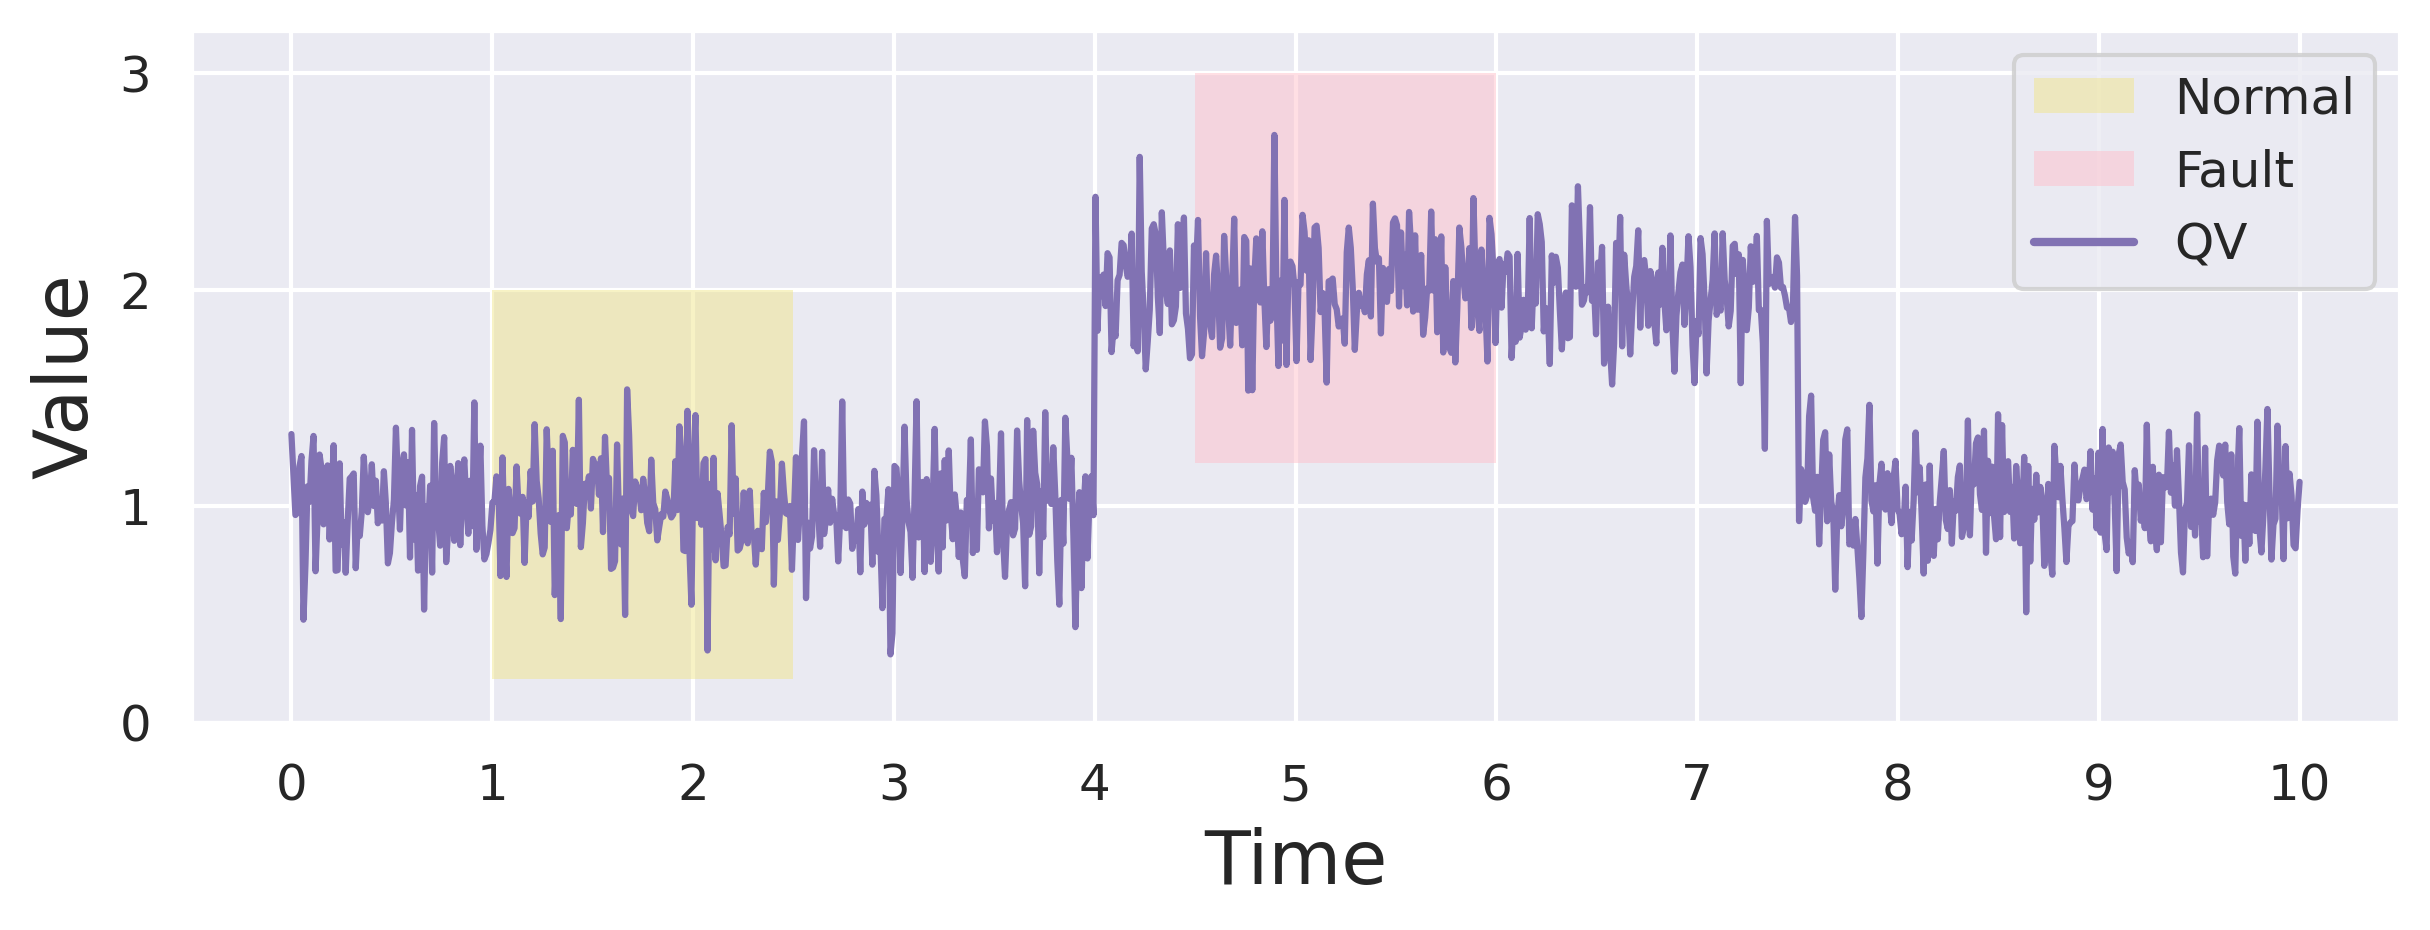

In [3]:
# 设置随机种子以便于重现
np.random.seed(2024)

# 设置 Seaborn 的主题和字体
sns.set_theme(style="dark")
sns.set_context("notebook", font_scale=1.5, rc={"font.family": "Arial"})
palette = sns.color_palette("deep")
custom_palette = [palette[0], palette[3], palette[4]] + palette[4:]

sns.set_palette(custom_palette)

f = plt.figure(figsize=(8, 3), dpi=300)

t = np.linspace(0, 10, 1000)

# 生成阶跃信号
step_signal = np.zeros_like(t)  # 初始化信号为 0
step_signal[(t >= 4) & (t < 7.5)] = 1  # 在 4 到 7.5 之间设置为 1

# 添加噪声
noise = np.random.normal(0, 0.2, size=t.shape)  # 均值为 0，标准差为 0.2
noisy_signal = step_signal + noise + 1  # 将噪声添加到阶跃信号上

# 绘制带噪声的信号
plt.plot(t, noisy_signal, label='QV', color=palette[4])

# 添加矩形
rect1 = patches.Rectangle((1, 0.2), 1.5, 1.8, facecolor='#F0E68C', alpha=0.5, edgecolor='none')  # 黄色矩形
plt.gca().add_patch(rect1)

rect2 = patches.Rectangle((4.5, 1.2), 1.5, 1.8, facecolor='pink', alpha=0.5, edgecolor='none')  # 粉色矩形
plt.gca().add_patch(rect2)

# 创建图例项
legend_elements = [
    patches.Patch(facecolor='#F0E68C', alpha=0.5, edgecolor='none', label='Normal'),
    patches.Patch(facecolor='pink', alpha=0.5, edgecolor='none', label='Fault')
]

# 设置标签和图例
tick_size = 12
plt.xlabel('Time')
plt.ylabel('Value')
plt.ylim(0, 3.2)
plt.legend(
    handles=legend_elements + [plt.Line2D([0], [0], color=palette[4], lw=2, label='QV')], 
    ncol=1, loc='upper right', prop={'size': tick_size}
)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xticks(np.arange(0, 11, 1))
plt.grid(True)

plt.tight_layout(pad=0.2)
plt.savefig('fault_diagnosis.png', dpi=300, bbox_inches='tight')
plt.show()


#### Process Monitoring

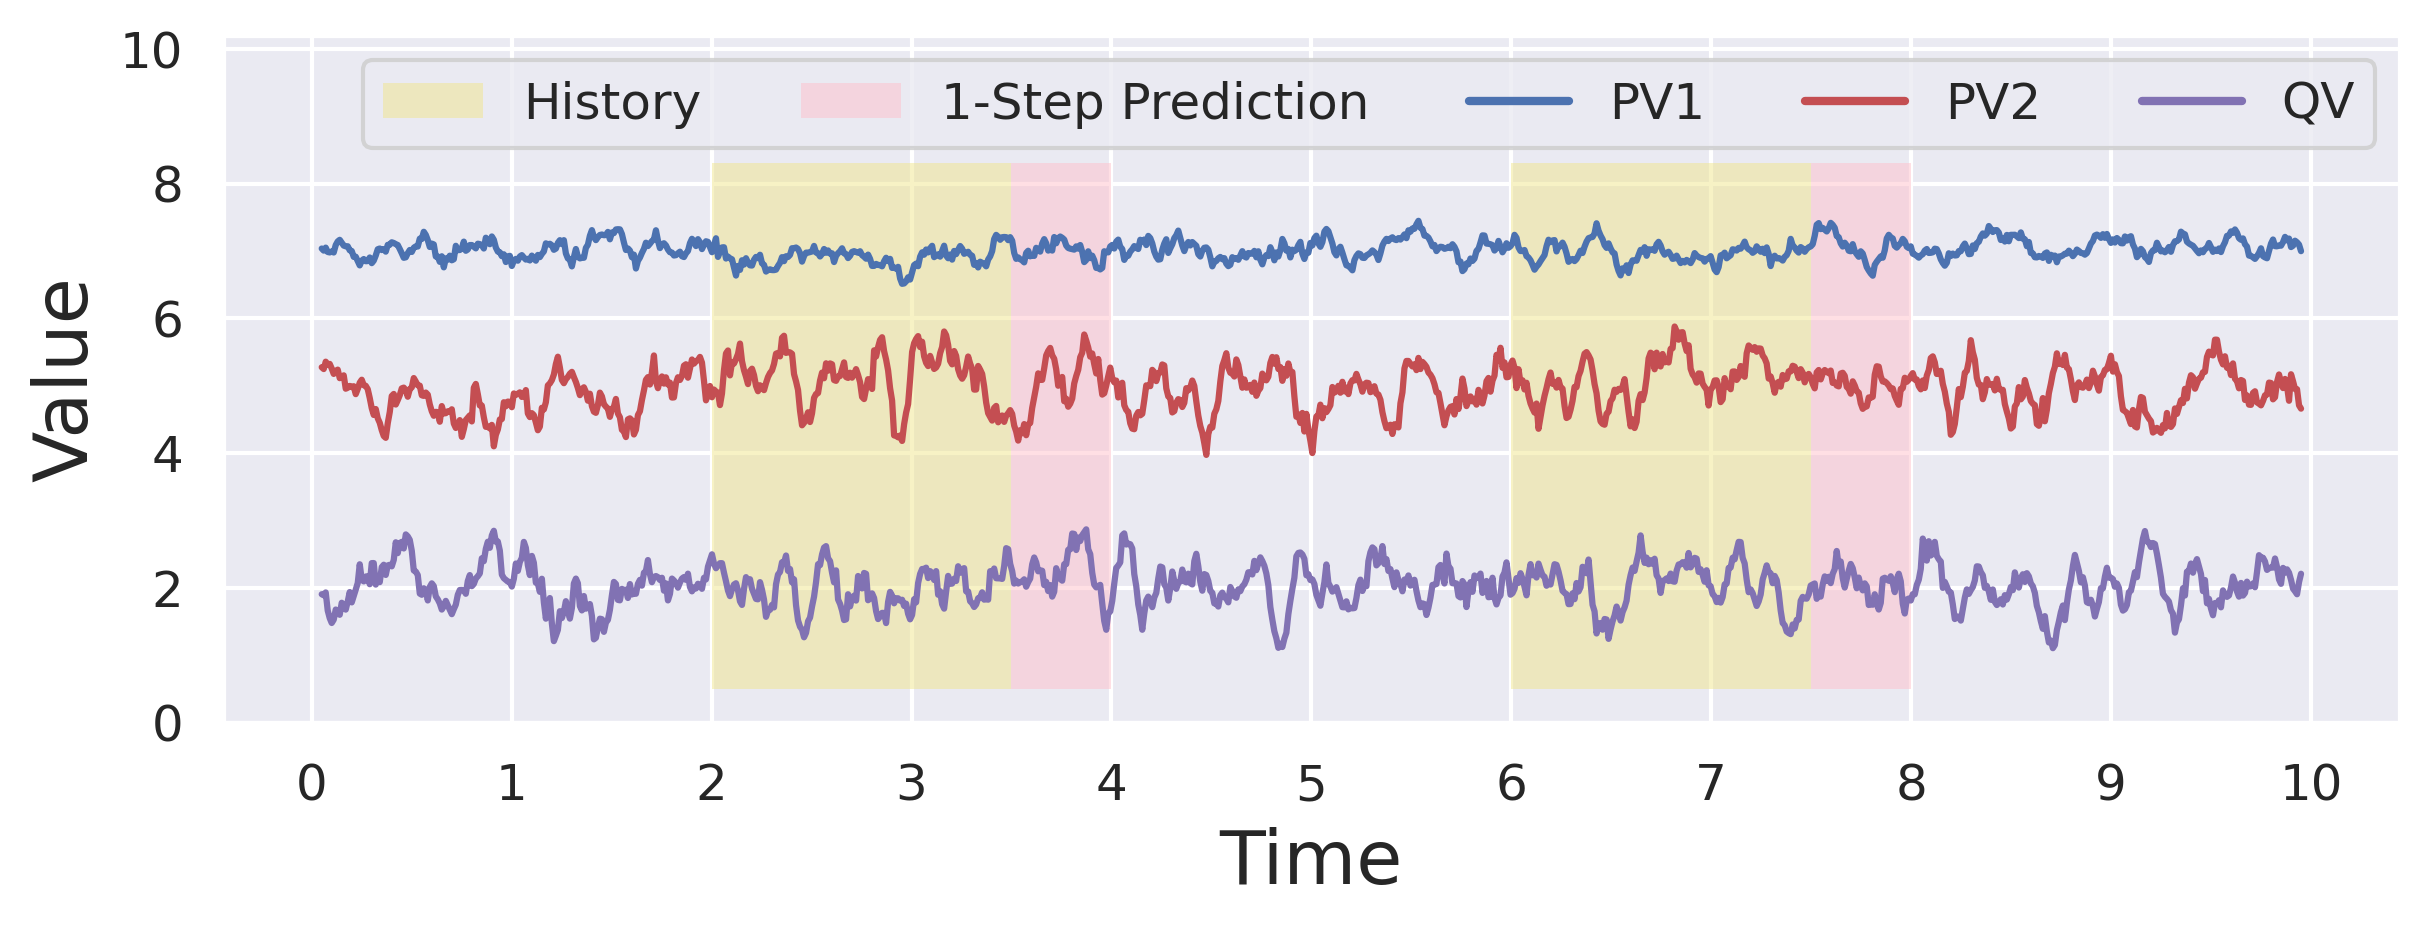

In [37]:
np.random.seed(2024)

sns.set_theme(style="dark")
sns.set_context("notebook", font_scale=1.5, rc={"font.family": "Arial"})
palette = sns.color_palette("deep")
custom_palette = [palette[0], palette[3], palette[4]] + palette[4:]

sns.set_palette(custom_palette)

# 生成 x 坐标
x = np.linspace(0, 10, 1000)  # 1000 个均匀分布的点

# 生成多个随机 y 坐标
num_variables = 3
mean_values = [7, 5, 2]       # 每个变量的均值
std_dev_values = [0.5, 1, 1]  # 每个变量的标准差
legends = ['PV1', 'PV2', 'QV']

# 创建一个图形
f = plt.figure(figsize=(8, 3), dpi=300)

for mean, std_dev, legend in zip(mean_values, std_dev_values, legends):
    y = np.random.normal(loc=mean, scale=std_dev, size=1000)
    window_size = 10  # 窗口大小
    y_smooth = np.convolve(y, np.ones(window_size) / window_size, mode='same')

    idx = slice(window_size // 2, -window_size // 2)
    plt.plot(x[idx], y_smooth[idx], label=legend)

rect = patches.Rectangle((2, 0.5), 1.5, 7.8, facecolor='#F0E68C', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)
rect = patches.Rectangle((3.5, 0.5), 0.5, 7.8, facecolor='pink', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)


rect = patches.Rectangle((6, 0.5), 1.5, 7.8, facecolor='#F0E68C', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)
rect = patches.Rectangle((7.5, 0.5), 0.5, 7.8, facecolor='pink', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)


legend_elements = [
    patches.Patch(facecolor='#F0E68C', alpha=0.5, edgecolor='none', label='History'),
    patches.Patch(facecolor='pink', alpha=0.5, edgecolor='none', label='1-Step Prediction')
]
legend_elements += [plt.Line2D([0], [0], color=custom_palette[i], lw=2, label=legend) for i, legend in enumerate(legends)]


# 设置标签和图例
tick_size = 12
plt.xlabel('Time')
plt.ylabel('Value')
plt.ylim(0, 10.2)
plt.legend(handles=legend_elements, ncol=5, loc='upper right', prop={'size': tick_size})
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 11, 2))
plt.grid(True)

plt.tight_layout(pad=0.2)
plt.savefig('process_monitoring.png', dpi=300, bbox_inches='tight')

#### Preditive Maintenance

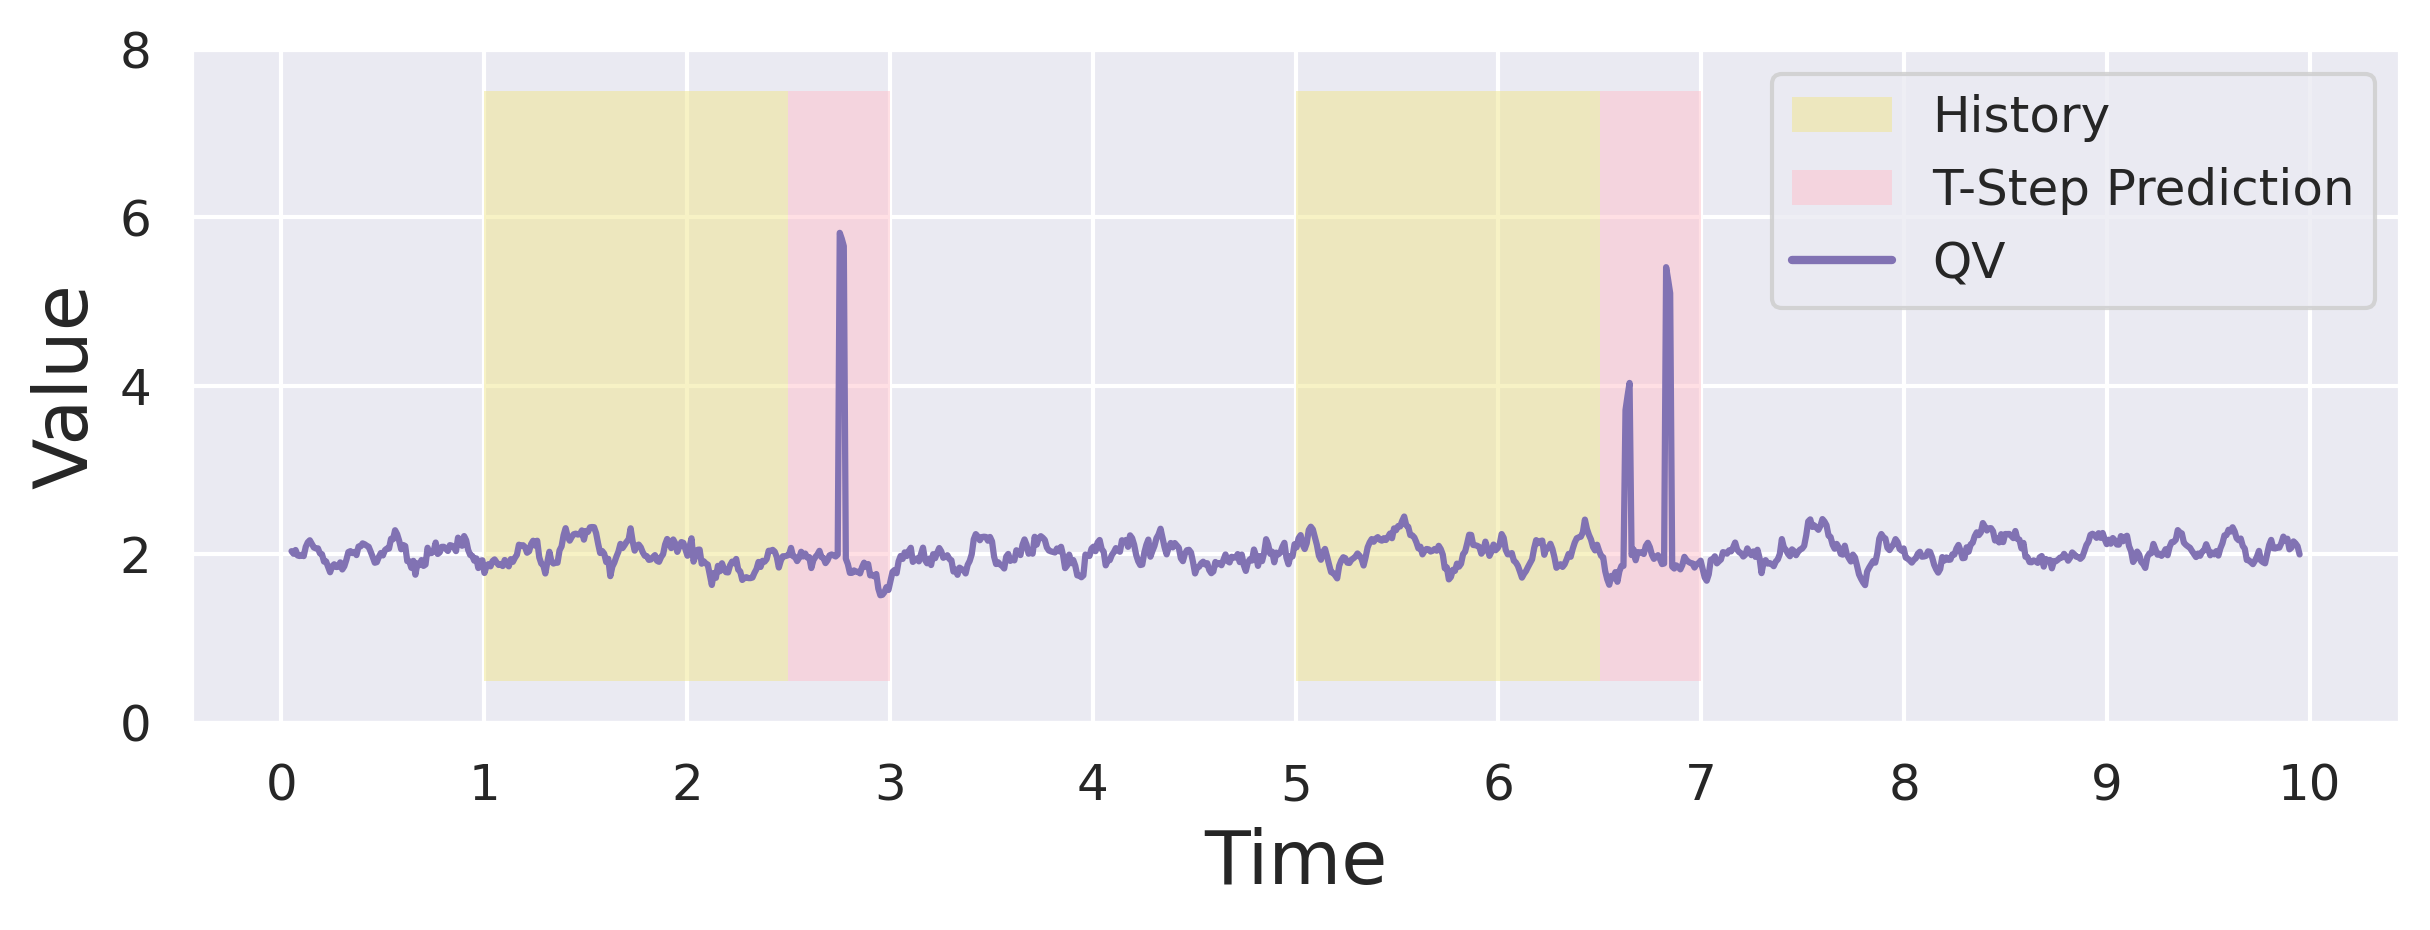

In [36]:
np.random.seed(2024)

sns.set_theme(style="dark")
sns.set_context("notebook", font_scale=1.5, rc={"font.family": "Arial"})
palette = sns.color_palette("deep")
custom_palette = [palette[4]] + palette[4:]

sns.set_palette(custom_palette)

# 生成 x 坐标
x = np.linspace(0, 10, 1000)  # 1000 个均匀分布的点

# 生成多个随机 y 坐标
num_variables = 3
mean_values = [2]       # 每个变量的均值
std_dev_values = [0.5]  # 每个变量的标准差
legends = ['QV']

# 创建一个图形
f = plt.figure(figsize=(8, 3), dpi=300)

for mean, std_dev, legend in zip(mean_values, std_dev_values, legends):
    y = np.random.normal(loc=mean, scale=std_dev, size=1000)
    window_size = 10  # 窗口大小
    y_smooth = np.convolve(y, np.ones(window_size) / window_size, mode='same')

    y_smooth[(x >= 2.75) & (x < 2.78)] *= 3
    y_smooth[(x >= 6.62) & (x < 6.65)] *= 2
    y_smooth[(x >= 6.82) & (x < 6.85)] *= 2.8

    idx = slice(window_size // 2, -window_size // 2)
    plt.plot(x[idx], y_smooth[idx], label=legend)

rect = patches.Rectangle((1, 0.5), 1.5, 7, facecolor='#F0E68C', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)
rect = patches.Rectangle((2.5, 0.5), 0.5, 7, facecolor='pink', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)


rect = patches.Rectangle((5, 0.5), 1.5, 7, facecolor='#F0E68C', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)
rect = patches.Rectangle((6.5, 0.5), 0.5, 7, facecolor='pink', alpha=0.5, edgecolor='none')  # (x, y), 宽度和高度
plt.gca().add_patch(rect)


legend_elements = [
    patches.Patch(facecolor='#F0E68C', alpha=0.5, edgecolor='none', label='History'),
    patches.Patch(facecolor='pink', alpha=0.5, edgecolor='none', label='T-Step Prediction')
]
legend_elements += [plt.Line2D([0], [0], color=custom_palette[i], lw=2, label=legend) for i, legend in enumerate(legends)]


# 设置标签和图例
tick_size = 12
plt.xlabel('Time')
plt.ylabel('Value')
plt.ylim(0, 8)
plt.legend(handles=legend_elements, ncol=1, loc='upper right', prop={'size': tick_size})
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 9, 2))
plt.grid(True)

plt.tight_layout(pad=0.2)
plt.savefig('predictive_maintenance.png', dpi=300, bbox_inches='tight')

#### RUL Estimation

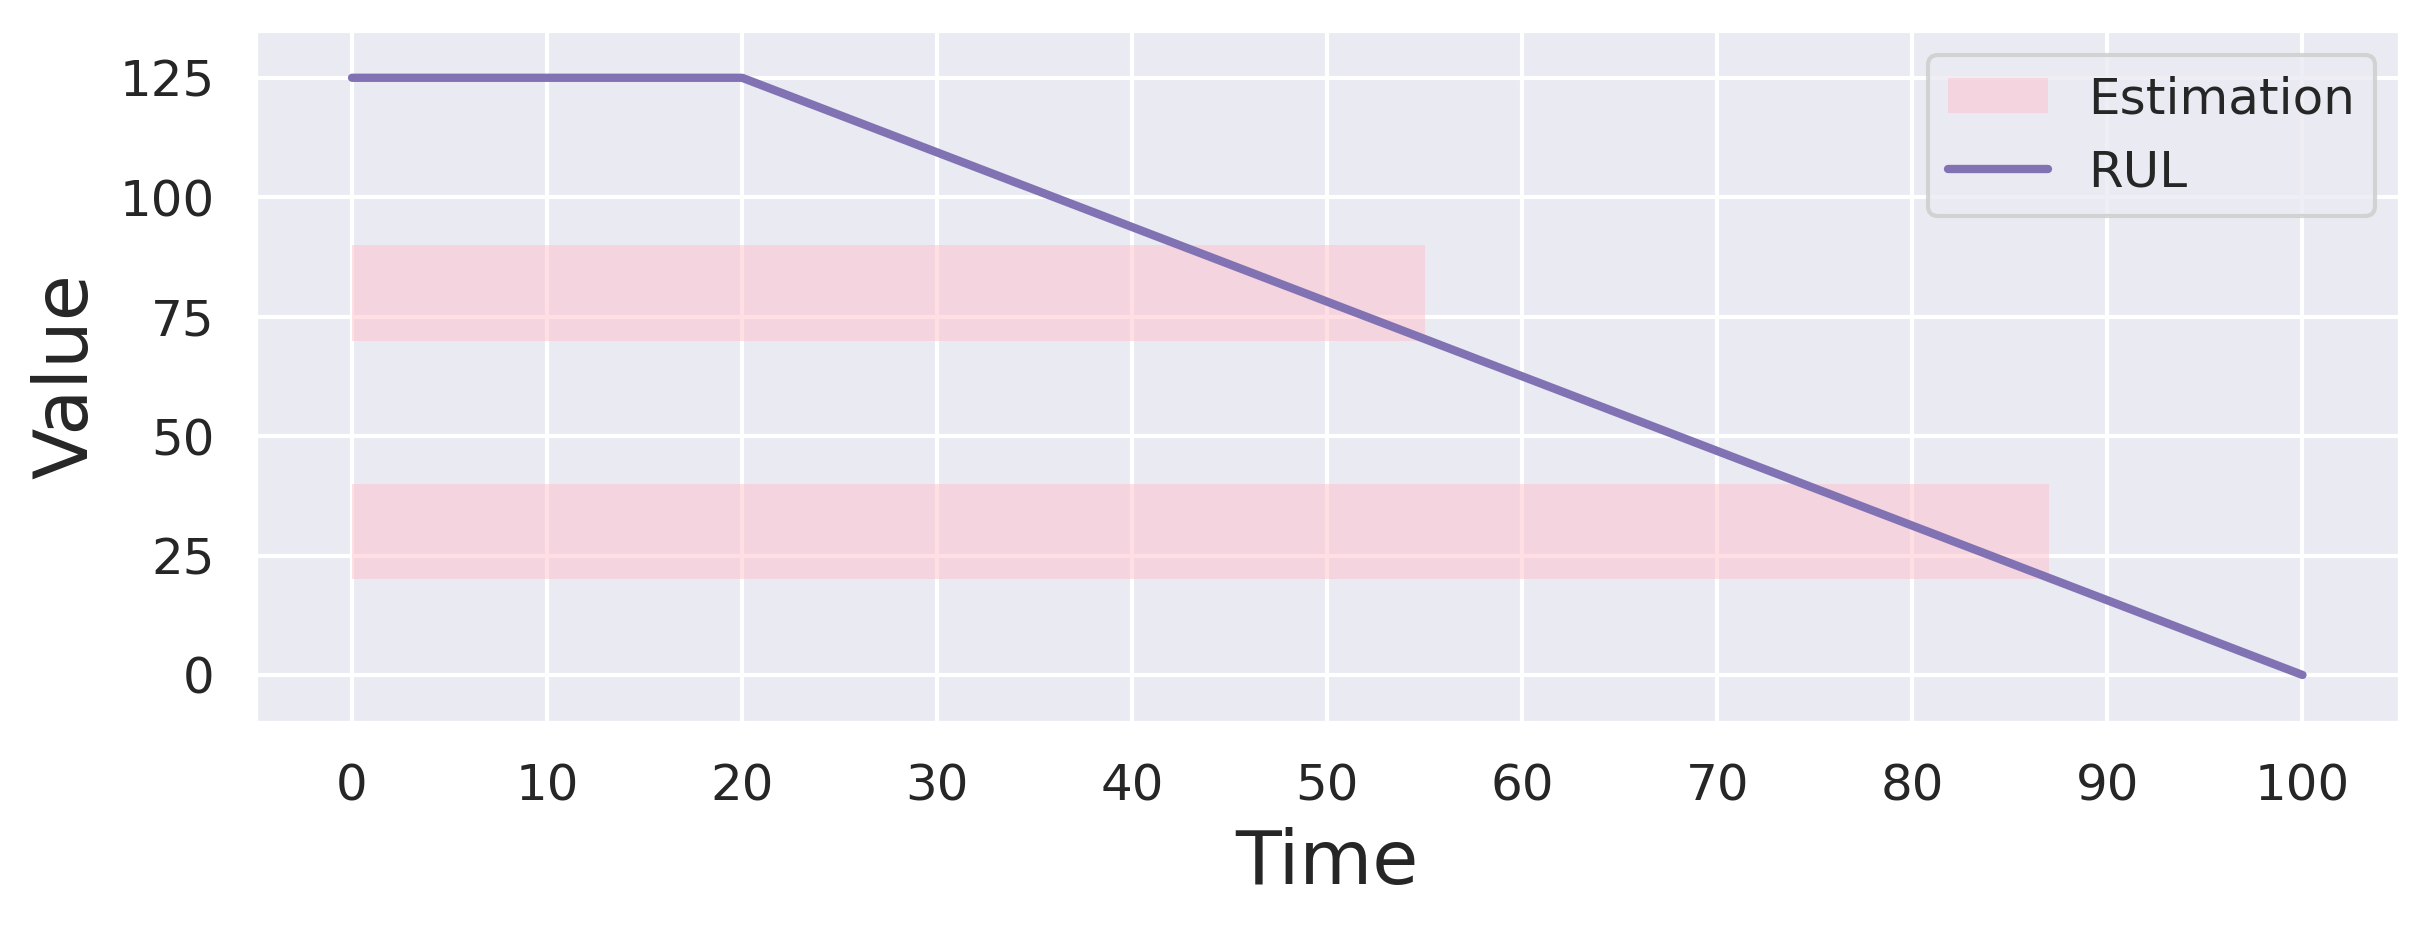

In [66]:
# 设置随机种子以便于重现
np.random.seed(2024)

# 设置 Seaborn 的主题和字体
sns.set_theme(style="dark")
sns.set_context("notebook", font_scale=1.5, rc={"font.family": "Arial"})
palette = sns.color_palette("deep")
custom_palette = [palette[0], palette[3], palette[4]] + palette[4:]

sns.set_palette(custom_palette)

f = plt.figure(figsize=(8, 3), dpi=300)

time = np.linspace(0, 100, 1000)  # 从 0 到 100 的 1000 个点

# 模拟 RUL 曲线
max_rul = 125  # 最大 RUL 值
maintain_duration = 20  # 维持阶段的持续时间

# 生成 RUL 数据
rul = np.zeros_like(time)  # 初始化 RUL 为 0
rul[time <= maintain_duration] = max_rul  # 维持阶段 RUL 值为 max_rul
rul[time > maintain_duration] = max_rul - (time[time > maintain_duration] - maintain_duration) * (max_rul / (100 - maintain_duration))

plt.plot(time, rul, color=palette[4], label='RUL', linewidth=2)

# 添加矩形
rect1 = patches.Rectangle((0, 70), 55, 20, facecolor='pink', alpha=0.5, edgecolor='none')  # 黄色矩形
plt.gca().add_patch(rect1)

rect1 = patches.Rectangle((0, 20), 87, 20, facecolor='pink', alpha=0.5, edgecolor='none')  # 黄色矩形
plt.gca().add_patch(rect1)

legend_elements = [
    patches.Patch(facecolor='pink', alpha=0.5, edgecolor='none', label='Estimation'),
]
legend_elements.append(plt.Line2D([0], [0], color=palette[4], lw=2, label='RUL'))

# 设置标签和图例
tick_size = 12
plt.xlabel('Time')
plt.ylabel('Value')
plt.ylim(-10, 135)
plt.legend(handles=legend_elements, ncol=1, loc='upper right', prop={'size': tick_size})
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.yticks(np.arange(0, 135, 25))
plt.xticks(np.arange(0, 110, 10))
plt.grid(True)

plt.tight_layout(pad=0.2)
plt.savefig('rul_estimation.png', dpi=300, bbox_inches='tight')

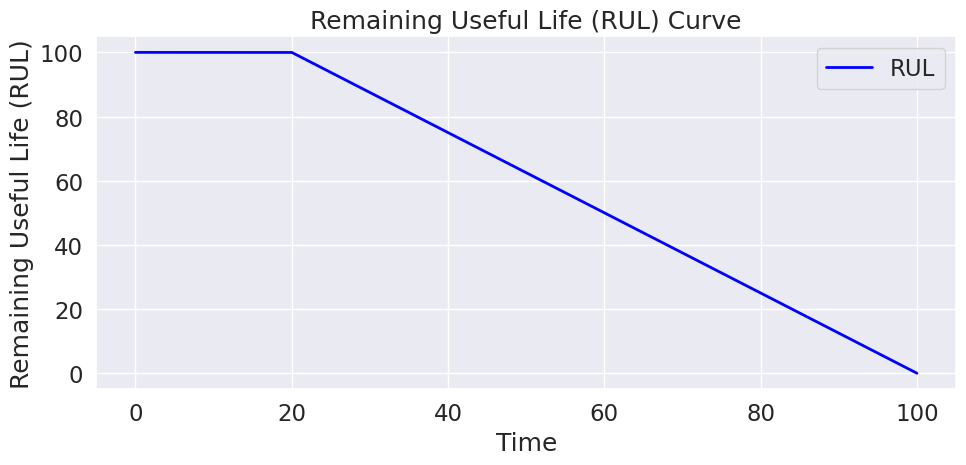

In [40]:



time = np.linspace(0, 100, 1000)  # 从 0 到 100 的 1000 个点

# 模拟 RUL 曲线
max_rul = 100  # 最大 RUL 值
maintain_duration = 20  # 维持阶段的持续时间

# 生成 RUL 数据
rul = np.zeros_like(time)  # 初始化 RUL 为 0

# 前面的维持阶段
rul[time <= maintain_duration] = max_rul  # 维持阶段 RUL 值为 max_rul

# 线性下降阶段
rul[time > maintain_duration] = max_rul - (time[time > maintain_duration] - maintain_duration) * (max_rul / (100 - maintain_duration))

# 创建图形
plt.figure(figsize=(10, 5))

# 绘制 RUL 曲线
plt.plot(time, rul, color='blue', label='RUL', linewidth=2)

# 设置标签和标题
plt.xlabel('Time')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('Remaining Useful Life (RUL) Curve')
plt.grid(True)
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()
